In [113]:
import jieba

In [115]:
#抽离每一句的关键词
stopw = [line.strip() for line in open("stop_word").readlines()]

data_file = open('need')
dataset = []
for line in data_file.readlines():
    line = line.replace("\ufeff",'')
    line = line.replace("\n",'')
    words = jieba.cut(line, cut_all=False)
    dataset.append(list(set(words)-set(stopw)))
dataset = dataset[:len(dataset)]
for se in dataset:
    print(" ".join(se))

火舌 张开 爆炸 射 手掌 手中 舔 击中 舐 火球 脸庞 岚
这场 破晓 黎明 毛毛细雨 倾盆大雨 减弱 天近
见到 工作 唯一 这是 农夫 泥地 铲子 中 挥
黄昏 风势 渐猛
早上 雄鸡 报晓 声音 第二天 吵醒
羊儿 如施 落单 跛 狼 恐惧 哀鸣 地瞎跑 脚 漫无目的 幻术 三只 十只 一只
一拳 特 打中 鼻子 派
锅碗瓢盆 不绝于耳 厨师 撞击 烹制 忙于 食物 助手 不到 之声
里 噼啪 炉子 空气 作响 蒸气 中 火焰
说 马特 发出 马厩 铰链 响亮 门 吱吱声 打开
一跤 金属 咒骂 声音 绊 听到 马特 敲击
停 减慢 马车 速度
木板 过桥 松脱 马特 打鼓 发出 声像 时 响亮 脚下 岚 喀嚓
出门 中 黎明 叫醒 姑娘 传来 清脆 鸟鸣 银匠 来到 曙色
里 流水声 听到 粗重 汩汩 喘息
归天 眶 冲天 响亮 铜钹 哭声 清脆 土司 一声
管家 膝盖 一枪 两个 粉碎
里 散 停 火药味 山谷 幽幽 空气 声响 中 流水 枪声 随风飘
乌鸦 心烦意乱 感到 叫声 令人
铁锤 敲打
趴在 手里 咳嗽 猛烈地 绳子 崖石
铜 叮叮 听 响到 手里 谷口 铃声 消失 慢慢 咚咚 停下
滚动 越来越 远 远处 雷声 山间
响起 纠缠 赤裸 声 四处 城里 时 警车
里 海水 声 电流 听成 一滴 见过 电话 干扰 海浪
学起 一声 汪 有人 兴起 狗叫 小狗 吠叫 汪汪 女
一圈 窗外 脚步声 脑壳 蝉声 无形 远去 传来 缠绕 一根 线
咕嘟 抽 一眼 水烟袋 师长
席卷 惊呼 真乃天 掌声 拍 全场 大腿
炸声裂 奔突 烟雾弥漫 城内 呼号 混乱 耳
终于 铜锣 声 沉钝 疼 事 担心 耳朵 发生 敲 莲城人
呼叫声 由远 砰砰 杂沓 脚步 作响 惊慌 传来 门外 渐近 枪声
路边 草叶 响 划得 裤腿
里 伸手 剧痛 锅子 想 咣当 没想 水池 指尖 落
东躲西 追 明晃晃 老枪 电视剧 刀 逮住 题材 主人公 眼看 构思 响 电话铃 逃 正 凶杀
编剧 家 可真会 小妖 笑 忽悠 吃
终于 开 门 手术室
鼾声 听到 呼吸 秀贞
闪 来个 罪犯 呜呜 瓮中捉鳖 警灯 包围 警车
吵吵嚷嚷 人头 老枪 黑压压 好像 程序 感觉 菜市场 满是
茶水 桌子 咣地 掉 倒 倾斜 茶壶 茶叶 壶盖
捅进 心脏 水果刀
下雨 路边 公交车站 躲进

In [119]:
effect_list = []
effect_file = open('effect')
for line in effect_file.readlines():
    words = line.split(' ')
    effect_list.extend(words)
effect_list = effect_list[:len(effect_list)-1]
print(effect_list)

['铃', '笑', '鼾', '警灯', '吵', '嚷', '咣', '捅', '雨', '风', '人声', '“当”', '铃', '风', '脚步', '咚咚', '琴', '海浪', '丝丝的声音', '琴', '炸', '鼓', '敲锣打鼓', '键盘', '钥匙锁孔', '门', '空调', '嗡嗡', '喇叭', '枪炮', '手机铃声', '开车', '翻书', '', '枪', '炮', '叮咚', '水滴', '惊叫', '敲', '嘟嘟', '掌声', '鼓掌', '叫好', '轰鸣', '雨', '鸡打鸣', '鸟', '哐啷', '水', '钹', '乌鸦', '打', '雷', '警车', '电', '蝉', '咕嘟咕嘟', '哭', '沙沙', '咣当', '笑\n', '鸡', '撞', '喘息', '钟']


# 定位词

In [121]:
# 1.如果有响起， 声， 之类明显的配音效提示，执行第二步
# 1.1 如果和这个声分一起的有东西，比如爆炸声，就直接去找爆炸匹配的音效，没有即返回
# 1.2 如果提示词是单独一个字或一个词，就去找句子中风 火 炸 等等和我的音效文件有相同的字的东西
def cues_with_dataset(ws):
    dz = []
    for w in ws:
        for z in w:
            dz.append(z)
    
    k_cue = list(set(cues)&set(dz))
    if len(k_cue) == 0:
        return None
    return k_cue

cues = ["响", "声"]
index = 0

sentence = []

for ws in dataset:
    k_cues = cues_with_dataset(ws)
    if k_cues != None:
        for kc in k_cues:
            contain_kc_word = [word for word in ws if kc in word][0]
            if len(contain_kc_word) > len(kc):
                for z in contain_kc_word:
                    effect = list(set(z) & set(effect_list))
                    if len(effect) > 0:
                        index += 1
                        print(effect, ws, "上面", index)
                        sentence.append(ws)
                continue
            if len(contain_kc_word) == len(kc):
                ws.remove(kc)
                for word in ws:
                    effect = list(set(word) & set(effect_list))
                    if len(effect) > 0:
                        index += 1
                        print(effect, ws, "下面", index)
                        sentence.append(ws)
                continue
    if k_cues == None:
        for word in ws:
            effect = list(set(word) & set(effect_list))
            if len(effect) > 0:
                index += 1
                print(effect, ws, "最下面", index)
                sentence.append(ws)
                continue

['炸'] ['火舌', '张开', '爆炸', '射', '手掌', '手中', '舔', '击中', '舐', '火球', '脸庞', '岚'] 最下面 1
['雨'] ['这场', '破晓', '黎明', '毛毛细雨', '倾盆大雨', '减弱', '天近'] 最下面 2
['雨'] ['这场', '破晓', '黎明', '毛毛细雨', '倾盆大雨', '减弱', '天近'] 最下面 3
['风'] ['黄昏', '风势', '渐猛'] 最下面 4
['打'] ['一拳', '特', '打中', '鼻子', '派'] 最下面 5
['门'] ['出门', '中', '黎明', '叫醒', '姑娘', '传来', '清脆', '鸟鸣', '银匠', '来到', '曙色'] 最下面 6
['鸟'] ['出门', '中', '黎明', '叫醒', '姑娘', '传来', '清脆', '鸟鸣', '银匠', '来到', '曙色'] 最下面 7
['水'] ['里', '流水声', '听到', '粗重', '汩汩', '喘息'] 上面 8
['哭'] ['归天', '眶', '冲天', '响亮', '铜钹', '哭声', '清脆', '土司', '一声'] 上面 9
['枪'] ['管家', '膝盖', '一枪', '两个', '粉碎'] 最下面 10
['打', '敲'] ['铁锤', '敲打'] 最下面 11
['铃'] ['铜', '叮叮', '听', '响到', '手里', '谷口', '铃声', '消失', '慢慢', '咚咚', '停下'] 上面 12
['雷'] ['滚动', '越来越', '远', '远处', '雷声', '山间'] 上面 13
['水'] ['里', '海水', '电流', '听成', '一滴', '见过', '电话', '干扰', '海浪'] 下面 14
['电'] ['里', '海水', '电流', '听成', '一滴', '见过', '电话', '干扰', '海浪'] 下面 15
['电'] ['里', '海水', '电流', '听成', '一滴', '见过', '电话', '干扰', '海浪'] 下面 16
['水'] ['咕嘟', '抽', '一眼', '水烟袋', '师长'] 最下面 17
['炸'] ['炸声裂', '奔突

In [128]:
# 制作有效数据集
def cues_with_ws(ws):
    dz = []
    for w in ws:
        for z in w:
            dz.append(z)
    
    k_cue = list(set(cues)&set(dz))
    if len(k_cue) == 0:
        return 0
    return 1

for ws in dataset:
    lenth = len(ws)
    longw = 0
    shortw = 0
    for word in ws:
        if len(word) > 2:
            longw = 1
        if len(word) < 2:
            shortw = 1
    has_cue = cues_with_ws(ws)
    print(str(lenth)+"\t"+str(longw)+"\t"+str(has_cue)+"\t"+str(shortw)+"\t"+str(1))

12	0	0	1	1
7	1	0	0	1
9	0	0	1	1
3	0	0	0	1
6	1	1	0	1
14	1	0	1	1
5	0	0	1	1
10	1	1	0	1
8	0	1	1	1
9	1	1	1	1
8	0	1	1	1
4	0	0	1	1
12	0	1	1	1
11	0	0	1	1
6	1	1	1	1
9	0	1	1	1
5	0	0	0	1
12	1	1	1	1
5	1	1	0	1
2	0	0	0	1
6	1	0	0	1
11	0	1	1	1
6	1	1	1	1
7	0	1	1	1
9	0	0	1	1
10	0	1	1	1
11	1	1	1	1
5	1	0	1	1
7	1	1	1	1
7	1	1	1	1
10	1	0	1	1
11	1	1	0	1
4	0	0	0	1
10	0	0	1	1
15	1	0	1	1
7	1	0	1	1
4	1	0	1	1
4	0	1	0	1
8	1	0	1	1
9	1	0	0	1
9	0	0	1	1
3	1	0	0	1
7	1	0	1	1
8	0	0	1	1
8	0	1	1	1
5	1	0	1	1
2	0	0	1	1
4	1	1	0	1
8	0	1	1	1
8	1	1	0	1
14	1	0	1	1
21	1	1	1	1
6	1	0	0	1
13	0	1	1	1
6	0	1	0	1
12	1	1	1	1
9	1	1	1	1
10	1	1	1	1
14	1	0	1	1
9	0	1	1	1
11	1	1	1	1
27	1	1	1	1
9	1	0	1	1
8	1	1	0	1
8	1	1	1	1
9	1	0	1	1
16	1	1	1	1
5	1	1	1	1
8	1	1	0	1
3	1	0	0	1
7	1	1	1	1
12	1	1	1	1
12	1	0	1	1
15	1	1	0	1
14	1	0	1	1
13	0	1	1	1
9	1	1	1	1
13	1	1	1	1
5	0	0	1	1
9	1	1	1	1
13	1	1	1	1
7	1	1	0	1
7	1	1	1	1
5	1	0	1	1
14	1	0	1	1
3	0	0	1	1
6	1	1	1	1
6	1	1	1	1
15	1	1	1	1
10	0	1	1	1
10	1	1	1	1
10	1	1	1	1
3	1	1	0	1
4	0	1	0	1
4	0	0	0	1
7	1	0	1	1
4	0	1	

In [148]:
#制作无效数据集
import  xml.dom.minidom
dom = xml.dom.minidom.parse("no")
root = dom.documentElement
nodes = root.getElementsByTagName('sentence')
no_list = []
text = []
for node in nodes:
    text.append(node.getAttribute("text").replace("\u3000",''))
for line in text:
    words = jieba.cut(line, cut_all=False)
    no_list.append(list(set(words)-set(stopw)))


for ns in no_list:
    lenth = len(ns)
    longw = 0
    shortw = 0
    for word in ns:
        if len(word) > 2:
            longw = 1
        if len(word) < 2:
            shortw = 1
    has_cue = cues_with_ws(ns)
    print(str(lenth)+"\t"+str(longw)+"\t"+str(has_cue)+"\t"+str(shortw)+"\t"+str(0))

2	0	0	0	0
9	1	0	1	0
11	1	0	1	0
3	1	0	1	0
9	0	0	1	0
5	1	0	1	0
3	0	0	1	0
5	0	0	1	0
6	1	0	0	0
8	1	0	1	0
1	0	0	1	0
3	0	0	1	0
1	1	0	0	0
14	1	0	0	0
5	1	0	0	0
7	1	0	1	0
13	1	0	0	0
11	1	0	0	0
6	1	0	1	0
4	1	0	0	0
3	1	0	0	0
6	1	0	1	0
1	1	0	0	0
8	0	0	1	0
7	1	0	0	0
4	1	0	0	0
10	1	0	1	0
6	0	0	1	0
10	1	0	0	0
1	0	0	0	0
3	1	0	1	0
9	1	0	0	0
7	0	0	1	0
10	1	0	1	0
5	0	0	0	0
10	1	0	1	0
3	1	0	1	0
2	0	0	1	0
2	1	1	1	0
3	1	0	1	0
2	1	0	0	0
3	0	0	1	0
3	0	0	0	0
8	0	0	0	0
0	0	0	0	0
11	1	0	1	0
7	0	0	1	0
17	1	0	1	0
5	0	0	1	0
5	0	0	1	0
1	0	0	0	0
10	1	0	1	0
3	0	0	1	0
2	1	0	0	0
11	0	0	1	0
4	1	0	0	0
6	0	0	0	0
5	0	0	0	0
9	1	0	1	0
18	1	0	1	0
2	0	0	0	0
5	0	0	1	0
5	0	0	0	0
4	1	0	0	0
9	0	0	1	0
3	1	0	0	0
7	1	0	0	0
5	0	0	0	0
2	0	0	0	0
8	1	0	0	0
4	0	1	0	0
6	1	0	0	0
5	1	0	0	0
4	1	0	0	0
5	0	0	0	0
13	0	0	1	0
6	1	0	1	0
3	0	0	1	0
3	0	1	1	0
5	1	1	1	0
13	1	0	1	0
8	1	0	1	0
11	1	1	1	0
3	0	0	0	0
17	1	0	1	0
5	0	0	1	0
5	1	0	1	0
3	1	0	1	0
6	0	1	1	0
14	1	0	0	0
8	1	0	1	0
25	1	0	1	0
10	1	0	1	0
13	1	0	1	0
6	1	0	1	0
6	0	0	1	0
6	1	0	0	0
17	1	0	1	

In [224]:
from math import log
import operator

def calcShannonEnt(dataSet):
    numEntries = len(dataset)
    labelCounts = {}
    for featVec in dataSet:
        currentLabel = featVec[-1]
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key]) / numEntries
        shannonEnt -= prob * log(prob, 2)
    return shannonEnt
        
def splitDataSet(dataSet, axis, value):
    retDataSet = []
    for featVec in dataSet:
        if featVec[axis] == value:
            reducedFeatVec = featVec[:axis]
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet

def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0]) - 1
    baseEntropy = calcShannonEnt(dataSet)
    bestInfoGain = -1.0
    bestFeature = -1
    for i in range(numFeatures):
        featList = [example[i] for example in dataSet]
        uniqueVals = set(featList)
        newEntropy = 0.0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)
            prob = len(subDataSet)/float(len(dataSet))
            newEntropy += prob * calcShannonEnt(subDataSet)
        infoGain = baseEntropy - newEntropy
        if(infoGain > bestInfoGain):
            bestInfoGain = infoGain
            bestFeature = i
    return bestFeature

def majorityCnt(classList):
    classCount = {}
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote] = 0
        classCount[vote] += 1
        sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1), reverse = True)
        return sortedClassCount[0][0]

def createTree(dataSet, labels):
    classList = [example[-1] for example in dataSet]
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    if len(dataset[0]) == 1:
        return majorityCnt(classList)
    
    bestFeat = chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    myTree = {bestFeatLabel:{}}
    del(labels[bestFeat])
    featValues = [example[bestFeat] for example in dataSet]
    uniqueValues = set(featValues)
    for value in uniqueValues:
        subLabels = labels[:]
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), subLabels)
    return myTree

In [1]:
file = open("tree")
lines = file.readlines()
for line in lines[1:]:
    line = line.replace("\n",'')
    ds.append(line.split("\t")[1:-1])
labels = ["longw", "has_cue", "shortw"]
# chooseBestFeatureToSplit(ds)
tree = createTree(ds, labels)
# createTree(ds, ["length", "longw", "has_cue", "shortw", "r"])

NameError: name 'ds' is not defined

In [230]:
test = [[1, 1, 'yes'], [1,1,'yes'], [0,1,'no']]
{'a': {0: 'no', 1: 'yes'}}

{'a': {0: 'no', 1: 'yes'}}

In [231]:
import operator
import matplotlib.pyplot as plt
#绘制属性图
decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")

#构造注解树 在python字典形式中如何存储树
def getNumLeafs(myTree):
    numLeafs=0 #初始化结点数
    # 下面三行为代码 python3 替换注释的两行代码
    firstSides = list(myTree.keys())
    firstStr = firstSides[0]  # 找到输入的第一个元素,第一个关键词为划分数据集类别的标签
    secondDict = myTree[firstStr]
    #firstStr = list(myTree)
    #secondDict=myTree[firstStr]
    for key in secondDict.keys(): #测试数据是否为字典形式
        if type(secondDict[key]).__name__=='dict': #type判断子结点是否为字典类型
            numLeafs+=getNumLeafs(secondDict[key])
            #若子节点也为字典，则也是判断结点，需要递归获取num
        else:  numLeafs+=1
    return numLeafs #返回整棵树的结点数
def getTreeDepth(myTree):
    maxDepth=0
    # 下面三行为代码 python3 替换注释的两行代码
    firstSides = list(myTree.keys())
    firstStr = firstSides[0]
    secondDict = myTree[firstStr]
    #firstStr=myTree.keys()[0]
    #secondDict=myTree[firstStr]#获取划分类别的标签
    for key in secondDict.keys():
        if type(secondDict[key]) == dict:
            thisDepth = 1 + getTreeDepth(secondDict[key])
    else:
        thisDepth = 1
    if thisDepth > maxDepth: maxDepth = thisDepth
    return maxDepth

def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy=parentPt,  xycoords='axes fraction',
             xytext=centerPt, textcoords='axes fraction',
             va="center", ha="center", bbox=nodeType, arrowprops=arrow_args )

def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)

def plotTree(myTree, parentPt, nodeTxt):
    numLeafs = getNumLeafs(myTree)  #计算树的宽度  totalW
    depth = getTreeDepth(myTree) #计算树的高度 存储在totalD
    #python3.x修改
    firstSides = list(myTree.keys())#firstStr = myTree.keys()[0]     #the text label for this node should be this
    firstStr = firstSides[0]  # 找到输入的第一个元素
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)#按照叶子结点个数划分x轴
    plotMidText(cntrPt, parentPt, nodeTxt) #标注结点属性
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD #y方向上的摆放位置 自上而下绘制，因此递减y值
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':#判断是否为字典 不是则为叶子结点
            plotTree(secondDict[key],cntrPt,str(key))        #递归继续向下找
        else:   #为叶子结点
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW #x方向计算结点坐标
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)#绘制
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))#添加文本信息
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD #下次重新调用时恢复y

def createPlot(inTree): #主函数
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)  # no ticks
    # createPlot.ax1 = plt.subplot(111, frameon=False) #ticks for demo puropses
    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5 / plotTree.totalW
    plotTree.yOff = 1.0
    plotTree(inTree, (0.5, 1.0), '')
    plt.savefig("a")
    plt.show()

#输出预先存储的树信息，避免每次测试都需要重新创建树
def retrieveTree(i):
    listOfTrees =[{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}},
                  {'no surfacing': {0: 'no', 1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}
                  ]
    return listOfTrees[i]


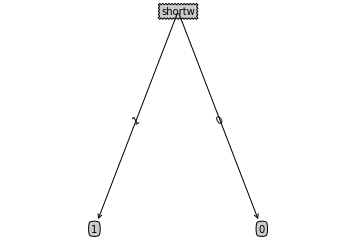

In [232]:
createPlot(tree)